# BZAN 552: Final Portfolio-Post 1

For my first post for my BZAN 552 Portfolio, I am going to use methods outlined in the course to answer a question I worked on this summer for my internship: who are a company's most valuable customers? Data outline: for my dataset, I am using the University of California-Irvine's Machine Learning Repository - which is an incredible resource with all kinds of datasets to work with. I will be using the Online Retail Data Set - a  transactional data set that contains all of the transaction from Jan. 12th, 2010 to Sep. 12th, 2011 for a United Kingdom-based online retailer that does not have a brick and mortar location (https://archive.ics.uci.edu/ml/datasets/online+retail)

Analysis Plan:
(Post 1) Prep, clean and explore the data

(Post 2) Construct a table with recency, frequency and monetary value of purchases (RFM) table by individual customer

(Post 3) Use Principle Component Analysis and K-means clustering to cluster the data

 I will annotate my code as I go so that everything is outlined step-by-step

In [1]:
#Importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
#Reading in the data 
df = pd.read_excel("Online Retail.xlsx")

#Looking at the top 10 rows of data
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


So the dataset contains 8 columns: 
InVoiceNo - the no. of the purchase
StockCode - the code of the product they purchased
Description - a description of the item they purchased
Quantity - the number of items they purchased
InvoiceDate - the date of the purchase
UnitPrice - price of the item
CustomerID - the unique identifier of the customer
Country - the geographic country of the customer

Now I need to dig deeper into the data. I will look for missing values, check
to make sure that unit price and quantity are all greater than 0, look at the
distribution by country and make sure the invoice dates are not miscoded


As part of the exploratory analysis, I will look at the geographic distribution by country

In [3]:
#looking at the number of unique countries
df.Country.nunique()
#There are 38 different countries total

38

In [4]:
df.Country.unique()
#The countries are:
#'United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
#'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
#'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
#'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
#'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
#'Lebanon', 'United Arab Emirates', 'Saudi Arabia', 
#'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
#'European Community', 'Malta', 'RSA'

#I wish latitude and longitude data were included - I'd love to see where "European Community" is

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [5]:
#Now to check for and drop any duplicates
customer_country=df[['Country', 'CustomerID']].drop_duplicates()

#Now to create a table that gives the geographic distribution by country
dist_by_country = customer_country.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False)
print(dist_by_country)


                 Country  CustomerID
36        United Kingdom        3950
14               Germany          95
13                France          87
31                 Spain          31
3                Belgium          25
33           Switzerland          21
27              Portugal          19
19                 Italy          15
12               Finland          12
1                Austria          11
25                Norway          10
24           Netherlands           9
0              Australia           9
6        Channel Islands           9
9                Denmark           9
7                 Cyprus           8
32                Sweden           8
20                 Japan           8
26                Poland           6
34                   USA           4
5                 Canada           4
37           Unspecified           4
18                Israel           4
15                Greece           4
10                  EIRE           3
23                 Malta           2
3

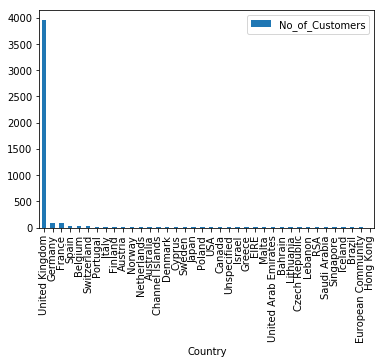

In [6]:
#Histogram visualizing the distribution of customers by country
dist_by_country.rename(columns={'CustomerID':'No_of_Customers'}, inplace=True)
dist_by_country.plot.bar(x = 'Country', y='No_of_Customers')
plt.show()

As the histogram clearly illustrates, the vast majority of customers are in the U.K. Because consumer behavior can vary from 
region to region, I will supbset the data on customers in the United Kingdom.

In [7]:
#Subsetting the data on UK customers only
df_1 = df.loc[df['Country'] == 'United Kingdom']
df_1.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


Now that the data is subset, I need to begin the cleaning.
The first step I do is check for NAs or missing values in each column of the subsetted data

In [8]:
df_1.isnull().sum(axis = 0)
#So there are significant missing data. There are 1,454 missing Descriptions and
#133,600 missing customer IDs

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
dtype: int64

Because I plan on creating an RFM table and that is agrregated at the customer level
I will just remove observations with missing customer IDs - rather than trying to impute them.

In [9]:
#Keeping only the observations where CustomerID is not null
df_1 = df_1[pd.notnull(df_1['CustomerID'])]

#Now to see how man customer IDs are left 
df_1.count()

#There are still 362,878 observations so I should be good 

#Now to double check and make sure that there are still no missing customer IDs
df_1.isnull().sum(axis = 0)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Now to check the minimum values of the price and quantity to make sure none of them were miscoded.
For the sake of this analysis, I am going to assume that you cannot have a negative price or quantity
In other words, the retailer did not pay customers to take items and the customers did not sell back items.

In [10]:
#This code will check the minimum value of the Quantity column - so I'll be able to see if there are negative values in there.
df_1.Quantity.min()

-80995

In [11]:
#So the minimum quantity is in fact negative. Because I know there are negative values in the quantity column, I will work on
#removing them

df_1 = df_1[(df_1['Quantity']>0)]
#Now the data is subset on non-negative quantities
df_1.shape
df_1.info()
#After additional subsetting, I have 354,345 rows - so I removed approximatley 8,500+ negative quantity values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354345 entries, 0 to 541893
Data columns (total 8 columns):
InvoiceNo      354345 non-null object
StockCode      354345 non-null object
Description    354345 non-null object
Quantity       354345 non-null int64
InvoiceDate    354345 non-null datetime64[ns]
UnitPrice      354345 non-null float64
CustomerID     354345 non-null float64
Country        354345 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.3+ MB


Because Total Price was not a column given to me, I will need to create one. Calculating price is fairly simple: 
total quantity x price. So if I purchased 80 eggs and eggs were 1 dollar each, I would have spent 80 dollars total. Following this formula will give me the data I need to calculate value of the purchases

In [12]:
#Creating the total price column
df_1['TotalPrice'] = df_1['Quantity'] * df_1['UnitPrice']

#Now I check to make sure that the column I created has been added into the data frame
df_1.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08


Another step in the data preparation is to order the data by purchase date. In the next blog post, when I create the RFM table,
this will help me calculate recency.

First I will find the oldest date and the most recent date. Fortunatley, it is already in the datetime64 format so I don't need
to do any tedious reformatting

In [13]:
#Finding the oldest date of purchase
df_1['InvoiceDate'].min()
#Timestamp('2010-12-01 08:26:00')

#Finding the most recent date of purchase
df_1['InvoiceDate'].max()
#Timestamp('2011-12-09 12:49:00')

Timestamp('2011-12-09 12:49:00')

In [14]:
#Because Recency is taken from a single point in time, I will use the most recent date, September 12, 2011, as the present or
#"Now". In order to do this I will need to use the datetime package

#Setting the most recent date as the current date/time
NOW = dt.datetime(2011,12,10)
df_1['InvoiceDate'] = pd.to_datetime(df_1['InvoiceDate'])

df_1.head(10)

df_1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 354345 entries, 0 to 541893
Data columns (total 9 columns):
InvoiceNo      354345 non-null object
StockCode      354345 non-null object
Description    354345 non-null object
Quantity       354345 non-null int64
InvoiceDate    354345 non-null datetime64[ns]
UnitPrice      354345 non-null float64
CustomerID     354345 non-null float64
Country        354345 non-null object
TotalPrice     354345 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 27.0+ MB


Now the data is cleaned and prepared so that I can create a RFM (Recency, Frequency, Monetary Value Table) of the Customers
of this particular business in the U.K.

In the next post (2), I will actually created the table and conduct some rudimentary segmentation

In the third and final post (3) in this portfolio, I will conduct principle component analysis to reduce the dimensionality and utilizes Kmeans clustering on the customer RFM table.

In [15]:
#Now I will write the data to a new file to start from in my second blog post
df_1.to_csv('Post2_data')